In [33]:
from selenium import webdriver
import pandas as pd
from pathlib import Path
import glob, os

#url = 'http://www.kric.go.kr/jsp/industry/rss/citystapassList.jsp'
year = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# http://www.kric.go.kr/jsp/industry/rss/citystapassList.jsp?q_org_cd=A010010021&q_fdate=2019 서울 메트로
# http://www.kric.go.kr/jsp/industry/rss/citystapassList.jsp?q_org_cd=A010010022&q_fdate=2019 #도시철도공사

url = "https://uri.seoul.go.kr/surc/archive/statsReportSummaryView.do?bbs_seq=26&bbs_master_seq=SUMMARY&title=서울시+지하철+호선별+역별+시간대별+승하차+인원+정보&ccl_se=60&defaultSearch=201907"

In [486]:


def kric_crawling(url):
    driver_path = 'C:\\Users\\15Z970-GA5BK\\Downloads\\chromedriver.exe'
    driver = webdriver.Chrome(driver_path)
    file_name = []
    #for y in year:
    #    for m in month:
            
            #new_url = 'http://www.kric.go.kr/jsp/industry/rss/citytimepassList.jsp?q_fdate={}&q_month={}'.format(y, m)
            #driver.get(new_url)
            #dl_excel_btn = driver.find_element_by_xpath('//*[@id="ContentS"]/div[3]/div/a[2]/img').click()
    for m in month[:8]:
        new_url = "https://uri.seoul.go.kr/surc/archive/statsReportSummaryView.do?bbs_seq=26&bbs_master_seq=SUMMARY&title=서울시+지하철+호선별+역별+시간대별+승하차+인원+정보&ccl_se=60&defaultSearch={}".format("20190"+str(m))
        driver.get(new_url)
        dl_excel_btn = driver.find_element_by_xpath('//*[@id="excel_download"]').click()

            
            



In [482]:

def rename_by_createddate():
    path = '/Users/15Z970-GA5BK/Downloads/xyz'
    x = 1
    c_date = []
    for y in year[-1]:
        for m in month:
            c_date.append(str(y) + "_" + str(m))
            
    files = sorted(os.listdir(path),key=os.path.getctime); 
    for i, file in enumerate(files):    
        
        if file.startswith('rename'):                                                                       
            continue;
        os.rename(file, "시간대별수송인원(월)" + "_" + c_date[i] + ".xls");                                                             

In [487]:
kric_crawling(url)

In [77]:
rename_by_createddate()

# 데이터 탐구

In [34]:
pd.set_option('display.max_columns', 500)
os.chdir("/Users/15Z970-GA5BK/Downloads/seoul_metro_station_hourly")
df = pd.read_excel('서울교통공사 2018년 일별 역별 시간대별 승하차인원(1_8호선).xlsx')
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,(단위:명)
0,날짜,호선,역번호,역명,구분,05 ~ 06,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,13 ~ 14,14 ~ 15,15 ~ 16,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,00 ~ 01,합 계
1,2018-01-01 00:00:00,1호선,150,서울역,승차,373,318,365,785,1047,1576,2510,3233,3145,2443,2980,3476,3891,3227,2945,2382,3070,1750,781,96,40393
2,2018-01-01 00:00:00,1호선,150,서울역,하차,205,1040,872,984,1650,1743,2175,2991,2877,2743,2687,2885,2845,2337,2131,1669,1404,868,477,147,34730
3,2018-01-01 00:00:00,1호선,151,시청,승차,87,105,124,197,291,499,722,612,580,821,907,1027,1102,1278,1163,1032,975,553,214,9,12298
4,2018-01-01 00:00:00,1호선,151,시청,하차,47,294,497,1017,673,657,820,958,1009,877,830,781,702,552,388,308,236,160,100,39,10945
5,2018-01-01 00:00:00,1호선,152,종각,승차,604,399,191,250,370,439,705,980,1153,1392,1710,2127,2172,2171,1873,1935,2084,1458,580,28,22621
6,2018-01-01 00:00:00,1호선,152,종각,하차,74,219,327,606,989,1086,1356,1815,1822,1807,1698,1538,1403,1211,722,420,342,186,152,33,17806
7,2018-01-01 00:00:00,1호선,153,종로3가,승차,282,211,133,233,320,471,763,1075,1256,1546,1742,1962,1984,1620,1430,1206,1213,922,313,16,18698
8,2018-01-01 00:00:00,1호선,153,종로3가,하차,48,128,165,348,750,947,1440,1863,2123,2039,1617,1309,970,814,462,322,264,165,139,35,15948
9,2018-01-01 00:00:00,1호선,154,종로5가,승차,54,61,78,146,221,330,556,765,1030,1146,1128,1026,1061,991,773,505,402,296,85,8,10662


In [492]:
os.chdir("/Users/15Z970-GA5BK/Downloads/seoul_metro_station_hourly")
df1 = pd.read_csv('서울교통공사 2016년 일별 역별 시간대별 승하차인원(1_8호선).csv', engine ='python')
df1.head()

,날짜,역번호,역명,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,12~13,13~14,14~15,15~16,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,24~
0,2016-01-01,150,서울역(150),하차,342,"1,637","1,753","1,856","2,438","2,425","2,548","2,718","2,973","2,921","3,341","3,108","2,656","2,134","1,859","1,394","1,344","1,056",612,222
1,2016-01-01,150,서울역(150),승차,469,339,584,"1,144","1,723","2,087","2,983","3,527","3,386","2,612","3,639","3,554","3,200","3,076","2,519","2,281","2,398","2,056",996,58
2,2016-01-01,151,시청(151),하차,68,306,554,939,689,665,884,956,"1,084","1,216","1,033","1,035",951,792,618,402,309,192,114,34
3,2016-01-01,151,시청(151),승차,103,127,110,191,298,582,700,604,731,900,"1,069","1,339","1,458","1,499","1,383","1,284","1,198",675,375,9
4,2016-01-01,152,종각(152),승차,702,341,234,296,335,419,733,865,991,"1,300","1,772","2,175","2,580","2,627","2,302","2,315","2,365","2,140","1,117",51


In [45]:
df2 = pd.read_excel('서울시 지하철 호선별 역별 시간대별 승하차 인원 정보(전체) (2).xls')

columns = df2.iloc[0, :]
df2.columns = columns
df2.drop([0,1], inplace=True)
df2


,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,10시-11시 승차인원,10시-11시 하차인원,11시-12시 승차인원,11시-12시 하차인원,12시-13시 승차인원,12시-13시 하차인원,13시-14시 승차인원,13시-14시 하차인원,14시-15시 승차인원,14시-15시 하차인원,15시-16시 승차인원,15시-16시 하차인원,16시-17시 승차인원,16시-17시 하차인원,17시-18시 승차인원,17시-18시 하차인원,18시-19시 승차인원,18시-19시 하차인원,19시-20시 승차인원,19시-20시 하차인원,20시-21시 승차인원,20시-21시 하차인원,21시-22시 승차인원,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
2,201901,1호선,서울역,927,22,10682,8774,13504,45545,39110,103863,80492,236747,61108,163026,68446,86198,89100,80051,98021,85869,101282,91792,86627,86386,113919,87211,118223,91594,161216,98032,249973,105075,142575,77807,97729,55056,96955,46680,70982,35481,33149,19442,3612,7167,0,410,0,0,0,0,20190203
3,201901,1호선,시청,74,0,2409,4049,3532,19241,7703,66876,9978,209349,12818,88793,16470,49343,22512,45645,26040,41405,34728,46800,40497,40429,51586,34787,54591,29029,80258,28534,170225,28331,76142,15634,57394,9141,58745,8204,38156,6345,14478,4079,981,1256,3,29,0,0,0,0,20190203
4,201901,1호선,종각,100,8,4409,5105,4593,26969,6733,104259,11028,300081,14563,167611,20165,80474,34617,76633,42088,71920,59893,75678,68149,62408,84211,57607,96197,55889,144446,63459,257735,83206,134259,51603,113555,19039,135586,12188,111743,8286,54264,5560,4886,1722,0,0,0,0,0,0,20190203
5,201901,1호선,종로3가,122,4,5061,2520,3876,12832,6066,29381,9735,84155,14261,100477,24063,87040,42723,96552,58902,101213,76615,103649,81392,88983,94128,72249,105094,61092,107194,56484,129847,62455,95225,37346,68613,14242,76067,10422,62004,7761,25970,5503,3214,2471,0,52,0,0,0,0,20190203
6,201901,1호선,종로5가,43,2,1934,3590,2935,14991,5143,40376,8509,132808,12652,78635,20434,62671,31918,69919,45533,72651,60255,69005,69651,63201,74447,54752,77646,48878,93779,42973,133826,40675,72550,24744,49690,10816,40800,7410,32727,5112,12013,3450,785,980,1,3,0,0,0,0,20190203
7,201901,1호선,동대문,621,7,15328,2164,10315,6673,14893,12227,24080,27692,23381,28386,20712,29569,22747,35954,28260,38658,31402,38011,34392,35395,34450,33461,34186,29483,34722,29805,33085,29970,22672,31274,18241,21650,16317,16942,13782,16009,7712,13475,1071,4691,3,35,0,0,0,0,20190203
8,201901,1호선,신설동,287,18,8847,2242,9805,8507,20077,23708,30505,77052,21746,42215,19219,26352,23432,24639,25947,24205,28510,25266,28537,24194,30381,24152,32723,23766,43942,28965,74303,31156,31339,25953,19997,16735,17833,15825,13174,15675,5830,10702,593,2638,0,16,0,0,0,0,20190203
9,201901,1호선,제기동,316,8,4874,2284,8388,8242,22615,18537,34862,50424,24786,43146,27130,46347,38424,63325,49342,71837,58332,79114,66681,70456,75677,58388,72189,40292,58939,32726,54182,29402,27310,24217,18230,14579,12731,12853,9087,12449,3758,8308,258,1890,0,0,0,0,0,0,20190203
10,201901,1호선,청량리(서울시립대입구),1321,11,10844,2912,16911,12013,46015,20676,65427,42910,42110,41090,35796,41999,43937,55752,53733,64244,55751,73268,63486,72150,70997,65918,75642,56026,68623,57290,57624,65469,35155,53706,27840,31541,21510,28397,15223,29237,7191,19427,441,6495,0,0,0,0,0,0,20190203
11,201901,1호선,동묘앞,93,3,3326,832,3418,3433,6088,8945,9415,22873,8843,17002,9745,19744,14192,28601,20731,35160,27534,40084,36068,40068,41458,33617,40873,23502,37880,16292,28274,11369,12349,8521,7475,6051,6022,5914,4480,6355,2215,4516,235,3138,2,242,1,0,0,0,20190203


In [44]:
df['24-'] = df2.iloc[:, -6:-1].sum(axis=1)
df['24-']
# 필요컬럼 = ['사용월', '호선명', '지하철역', '05시-06시 승차인원', '06시-07시 승차인원', '07시-08시 승차인원', '08시-09시 승차인원', '10시-11시 승차인원', '11시-12시 승차인원', '12시-13시 승차인원', '13시-14시 승차인원', '14시-15시 승차인원', '15시-16시 승차인원', '16시-17시 승차인원', '17시-18시 승차인원', '18시-19시 승차인원', '19시-20시 승차인원', '20시-21시 승차인원', '21시-22시 승차인원','22시-23시 승차인원','23시-24시 승차인원','24시- 승차인원']
#승차.reset_index()

0                NaN
1                NaN
2          4100000.0
3           290000.0
4                0.0
5           520000.0
6            30000.0
7           350000.0
8           160000.0
9                0.0
10               0.0
11         2421000.0
12          890000.0
13         9850000.0
14          780000.0
15          530000.0
16         1340000.0
17          530000.0
18          541000.0
19         1080000.0
20          240000.0
21         1131100.0
22        11430000.0
23        11830000.0
24         1530000.0
25         2431000.0
26          961100.0
27         4181000.0
28         1890000.0
29         1211100.0
             ...    
200721           NaN
200722           NaN
200723           NaN
200724           NaN
200725           NaN
200726           NaN
200727           NaN
200728           NaN
200729           NaN
200730           NaN
200731           NaN
200732           NaN
200733           NaN
200734           NaN
200735           NaN
200736           NaN
200737       

In [560]:
하차 = df2.iloc[:,4::2]
하차.reset_index()


,index,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,14시-15시 하차인원,15시-16시 하차인원,16시-17시 하차인원,17시-18시 하차인원,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
0,2,22,8774,45545,103863,236747,163026,86198,80051,85869,91792,86386,87211,91594,98032,105075,77807,55056,46680,35481,19442,7167,410,0,0
1,3,0,4049,19241,66876,209349,88793,49343,45645,41405,46800,40429,34787,29029,28534,28331,15634,9141,8204,6345,4079,1256,29,0,0
2,4,8,5105,26969,104259,300081,167611,80474,76633,71920,75678,62408,57607,55889,63459,83206,51603,19039,12188,8286,5560,1722,0,0,0
3,5,4,2520,12832,29381,84155,100477,87040,96552,101213,103649,88983,72249,61092,56484,62455,37346,14242,10422,7761,5503,2471,52,0,0
4,6,2,3590,14991,40376,132808,78635,62671,69919,72651,69005,63201,54752,48878,42973,40675,24744,10816,7410,5112,3450,980,3,0,0
5,7,7,2164,6673,12227,27692,28386,29569,35954,38658,38011,35395,33461,29483,29805,29970,31274,21650,16942,16009,13475,4691,35,0,0
6,8,18,2242,8507,23708,77052,42215,26352,24639,24205,25266,24194,24152,23766,28965,31156,25953,16735,15825,15675,10702,2638,16,0,0
7,9,8,2284,8242,18537,50424,43146,46347,63325,71837,79114,70456,58388,40292,32726,29402,24217,14579,12853,12449,8308,1890,0,0,0
8,10,11,2912,12013,20676,42910,41090,41999,55752,64244,73268,72150,65918,56026,57290,65469,53706,31541,28397,29237,19427,6495,0,0,0
9,11,3,832,3433,8945,22873,17002,19744,28601,35160,40084,40068,33617,23502,16292,11369,8521,6051,5914,6355,4516,3138,242,0,0


In [562]:
승차.append(하차)

,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,10시-11시 승차인원,10시-11시 하차인원,11시-12시 승차인원,11시-12시 하차인원,12시-13시 승차인원,12시-13시 하차인원,13시-14시 승차인원,13시-14시 하차인원,14시-15시 승차인원,14시-15시 하차인원,15시-16시 승차인원,15시-16시 하차인원,16시-17시 승차인원,16시-17시 하차인원,17시-18시 승차인원,17시-18시 하차인원,18시-19시 승차인원,18시-19시 하차인원,19시-20시 승차인원,19시-20시 하차인원,20시-21시 승차인원,20시-21시 하차인원,21시-22시 승차인원,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,작업일자
2,3612,NaN,0,NaN,0,NaN,0,NaN,927,NaN,10682,NaN,13504,NaN,39110,NaN,80492,NaN,61108,NaN,68446,NaN,89100,NaN,98021,NaN,101282,NaN,86627,NaN,113919,NaN,118223,NaN,161216,NaN,249973,NaN,142575,NaN,97729,NaN,96955,NaN,70982,NaN,33149,NaN,20190203
3,981,NaN,3,NaN,0,NaN,0,NaN,74,NaN,2409,NaN,3532,NaN,7703,NaN,9978,NaN,12818,NaN,16470,NaN,22512,NaN,26040,NaN,34728,NaN,40497,NaN,51586,NaN,54591,NaN,80258,NaN,170225,NaN,76142,NaN,57394,NaN,58745,NaN,38156,NaN,14478,NaN,20190203
4,4886,NaN,0,NaN,0,NaN,0,NaN,100,NaN,4409,NaN,4593,NaN,6733,NaN,11028,NaN,14563,NaN,20165,NaN,34617,NaN,42088,NaN,59893,NaN,68149,NaN,84211,NaN,96197,NaN,144446,NaN,257735,NaN,134259,NaN,113555,NaN,135586,NaN,111743,NaN,54264,NaN,20190203
5,3214,NaN,0,NaN,0,NaN,0,NaN,122,NaN,5061,NaN,3876,NaN,6066,NaN,9735,NaN,14261,NaN,24063,NaN,42723,NaN,58902,NaN,76615,NaN,81392,NaN,94128,NaN,105094,NaN,107194,NaN,129847,NaN,95225,NaN,68613,NaN,76067,NaN,62004,NaN,25970,NaN,20190203
6,785,NaN,1,NaN,0,NaN,0,NaN,43,NaN,1934,NaN,2935,NaN,5143,NaN,8509,NaN,12652,NaN,20434,NaN,31918,NaN,45533,NaN,60255,NaN,69651,NaN,74447,NaN,77646,NaN,93779,NaN,133826,NaN,72550,NaN,49690,NaN,40800,NaN,32727,NaN,12013,NaN,20190203
7,1071,NaN,3,NaN,0,NaN,0,NaN,621,NaN,15328,NaN,10315,NaN,14893,NaN,24080,NaN,23381,NaN,20712,NaN,22747,NaN,28260,NaN,31402,NaN,34392,NaN,34450,NaN,34186,NaN,34722,NaN,33085,NaN,22672,NaN,18241,NaN,16317,NaN,13782,NaN,7712,NaN,20190203
8,593,NaN,0,NaN,0,NaN,0,NaN,287,NaN,8847,NaN,9805,NaN,20077,NaN,30505,NaN,21746,NaN,19219,NaN,23432,NaN,25947,NaN,28510,NaN,28537,NaN,30381,NaN,32723,NaN,43942,NaN,74303,NaN,31339,NaN,19997,NaN,17833,NaN,13174,NaN,5830,NaN,20190203
9,258,NaN,0,NaN,0,NaN,0,NaN,316,NaN,4874,NaN,8388,NaN,22615,NaN,34862,NaN,24786,NaN,27130,NaN,38424,NaN,49342,NaN,58332,NaN,66681,NaN,75677,NaN,72189,NaN,58939,NaN,54182,NaN,27310,NaN,18230,NaN,12731,NaN,9087,NaN,3758,NaN,20190203
10,441,NaN,0,NaN,0,NaN,0,NaN,1321,NaN,10844,NaN,16911,NaN,46015,NaN,65427,NaN,42110,NaN,35796,NaN,43937,NaN,53733,NaN,55751,NaN,63486,NaN,70997,NaN,75642,NaN,68623,NaN,57624,NaN,35155,NaN,27840,NaN,21510,NaN,15223,NaN,7191,NaN,20190203
11,235,NaN,2,NaN,1,NaN,0,NaN,93,NaN,3326,NaN,3418,NaN,6088,NaN,9415,NaN,8843,NaN,9745,NaN,14192,NaN,20731,NaN,27534,NaN,36068,NaN,41458,NaN,40873,NaN,37880,NaN,28274,NaN,12349,NaN,7475,NaN,6022,NaN,4480,NaN,2215,NaN,20190203


In [557]:
final

,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,10시-11시 승차인원,10시-11시 하차인원,11시-12시 승차인원,11시-12시 하차인원,12시-13시 승차인원,12시-13시 하차인원,13시-14시 승차인원,13시-14시 하차인원,14시-15시 승차인원,14시-15시 하차인원,15시-16시 승차인원,15시-16시 하차인원,16시-17시 승차인원,16시-17시 하차인원,17시-18시 승차인원,17시-18시 하차인원,18시-19시 승차인원,18시-19시 하차인원,19시-20시 승차인원,19시-20시 하차인원,20시-21시 승차인원,20시-21시 하차인원,21시-22시 승차인원,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,작업일자
2,3612,NaN,0,NaN,0,NaN,0,NaN,927,NaN,10682,NaN,13504,NaN,39110,NaN,80492,NaN,61108,NaN,68446,NaN,89100,NaN,98021,NaN,101282,NaN,86627,NaN,113919,NaN,118223,NaN,161216,NaN,249973,NaN,142575,NaN,97729,NaN,96955,NaN,70982,NaN,33149,NaN,20190203
3,981,NaN,3,NaN,0,NaN,0,NaN,74,NaN,2409,NaN,3532,NaN,7703,NaN,9978,NaN,12818,NaN,16470,NaN,22512,NaN,26040,NaN,34728,NaN,40497,NaN,51586,NaN,54591,NaN,80258,NaN,170225,NaN,76142,NaN,57394,NaN,58745,NaN,38156,NaN,14478,NaN,20190203
4,4886,NaN,0,NaN,0,NaN,0,NaN,100,NaN,4409,NaN,4593,NaN,6733,NaN,11028,NaN,14563,NaN,20165,NaN,34617,NaN,42088,NaN,59893,NaN,68149,NaN,84211,NaN,96197,NaN,144446,NaN,257735,NaN,134259,NaN,113555,NaN,135586,NaN,111743,NaN,54264,NaN,20190203
5,3214,NaN,0,NaN,0,NaN,0,NaN,122,NaN,5061,NaN,3876,NaN,6066,NaN,9735,NaN,14261,NaN,24063,NaN,42723,NaN,58902,NaN,76615,NaN,81392,NaN,94128,NaN,105094,NaN,107194,NaN,129847,NaN,95225,NaN,68613,NaN,76067,NaN,62004,NaN,25970,NaN,20190203
6,785,NaN,1,NaN,0,NaN,0,NaN,43,NaN,1934,NaN,2935,NaN,5143,NaN,8509,NaN,12652,NaN,20434,NaN,31918,NaN,45533,NaN,60255,NaN,69651,NaN,74447,NaN,77646,NaN,93779,NaN,133826,NaN,72550,NaN,49690,NaN,40800,NaN,32727,NaN,12013,NaN,20190203
7,1071,NaN,3,NaN,0,NaN,0,NaN,621,NaN,15328,NaN,10315,NaN,14893,NaN,24080,NaN,23381,NaN,20712,NaN,22747,NaN,28260,NaN,31402,NaN,34392,NaN,34450,NaN,34186,NaN,34722,NaN,33085,NaN,22672,NaN,18241,NaN,16317,NaN,13782,NaN,7712,NaN,20190203
8,593,NaN,0,NaN,0,NaN,0,NaN,287,NaN,8847,NaN,9805,NaN,20077,NaN,30505,NaN,21746,NaN,19219,NaN,23432,NaN,25947,NaN,28510,NaN,28537,NaN,30381,NaN,32723,NaN,43942,NaN,74303,NaN,31339,NaN,19997,NaN,17833,NaN,13174,NaN,5830,NaN,20190203
9,258,NaN,0,NaN,0,NaN,0,NaN,316,NaN,4874,NaN,8388,NaN,22615,NaN,34862,NaN,24786,NaN,27130,NaN,38424,NaN,49342,NaN,58332,NaN,66681,NaN,75677,NaN,72189,NaN,58939,NaN,54182,NaN,27310,NaN,18230,NaN,12731,NaN,9087,NaN,3758,NaN,20190203
10,441,NaN,0,NaN,0,NaN,0,NaN,1321,NaN,10844,NaN,16911,NaN,46015,NaN,65427,NaN,42110,NaN,35796,NaN,43937,NaN,53733,NaN,55751,NaN,63486,NaN,70997,NaN,75642,NaN,68623,NaN,57624,NaN,35155,NaN,27840,NaN,21510,NaN,15223,NaN,7191,NaN,20190203
11,235,NaN,2,NaN,1,NaN,0,NaN,93,NaN,3326,NaN,3418,NaN,6088,NaN,9415,NaN,8843,NaN,9745,NaN,14192,NaN,20731,NaN,27534,NaN,36068,NaN,41458,NaN,40873,NaN,37880,NaN,28274,NaN,12349,NaN,7475,NaN,6022,NaN,4480,NaN,2215,NaN,20190203


In [522]:
하차

,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,14시-15시 하차인원,15시-16시 하차인원,16시-17시 하차인원,17시-18시 하차인원,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
2,22,8774,45545,103863,236747,163026,86198,80051,85869,91792,86386,87211,91594,98032,105075,77807,55056,46680,35481,19442,7167,410,0,0
3,0,4049,19241,66876,209349,88793,49343,45645,41405,46800,40429,34787,29029,28534,28331,15634,9141,8204,6345,4079,1256,29,0,0
4,8,5105,26969,104259,300081,167611,80474,76633,71920,75678,62408,57607,55889,63459,83206,51603,19039,12188,8286,5560,1722,0,0,0
5,4,2520,12832,29381,84155,100477,87040,96552,101213,103649,88983,72249,61092,56484,62455,37346,14242,10422,7761,5503,2471,52,0,0
6,2,3590,14991,40376,132808,78635,62671,69919,72651,69005,63201,54752,48878,42973,40675,24744,10816,7410,5112,3450,980,3,0,0
7,7,2164,6673,12227,27692,28386,29569,35954,38658,38011,35395,33461,29483,29805,29970,31274,21650,16942,16009,13475,4691,35,0,0
8,18,2242,8507,23708,77052,42215,26352,24639,24205,25266,24194,24152,23766,28965,31156,25953,16735,15825,15675,10702,2638,16,0,0
9,8,2284,8242,18537,50424,43146,46347,63325,71837,79114,70456,58388,40292,32726,29402,24217,14579,12853,12449,8308,1890,0,0,0
10,11,2912,12013,20676,42910,41090,41999,55752,64244,73268,72150,65918,56026,57290,65469,53706,31541,28397,29237,19427,6495,0,0,0
11,3,832,3433,8945,22873,17002,19744,28601,35160,40084,40068,33617,23502,16292,11369,8521,6051,5914,6355,4516,3138,242,0,0


In [ ]:
df2 

In [361]:

def load_allfiles():
    pd.set_option('display.max_columns', 500)
    os.chdir("/Users/15Z970-GA5BK/Downloads/seoul_metro_station_hourly")
    results = pd.DataFrame([])

    for counter, file in enumerate(glob.glob("*")):
        namedf = pd.read_excel(file)


        try:
            columns = namedf.iloc[1, :]
            namedf.columns = columns
            namedf.drop([0,1], inplace = True)
            namedf = namedf.iloc[:-2]
            results = results.append(namedf)
        except:
            continue
        
    return results



In [362]:
results = load_allfiles()

In [363]:
results

1,연월,시간구분/기관,합계_승차인원,합계_하차인원,서울메트로_승차,서울메트로_하차,서울도시철도공사_승차,서울도시철도공사_하차,부산교통공사_승차,부산교통공사_하차,대구도시철도공사_승차,대구도시철도공사_하차,대전도시철도공사_승차,대전도시철도공사_하차,광주도시철도공사_승차,광주도시철도공사_하차,인천교통공사_승차,인천교통공사_하차,코레일공항철도_승차,코레일공항철도_하차,부산-김해경전철_승차,부산-김해경전철_하차,용인경량전철_승차,용인경량전철_하차,의정부경전철_승차,의정부경전철_하차
2,201601,합 계,230307892,222969344,120082517,119807990,53129696,52245619,26152089,26022357,12674526,12589967,3270423,3258342,687271,679292,5526535,5419523,5821538,0,1380211,1372469,625282,621259,957804,952526
3,201601,00-01시간대,614414,1928059,437044,1171423,117605,545396,17925,135019,645,8628,361,6909,14,246,25866,52512,12004,0,14,14,95,95,2841,2841
4,201601,01-02시간대,11444,66732,9527,42997,1016,21484,702,1419,49,89,5,6,7,9,118,728,20,0,0,0,0,0,0,0
5,201601,02-03시간대,871,1503,391,708,35,83,421,693,0,0,0,1,4,8,10,10,10,0,0,0,0,0,0,0
6,201601,03-04시간대,435,927,15,91,0,0,356,834,0,0,0,0,7,2,0,0,57,0,0,0,0,0,0,0
7,201601,04-05시간대,41363,6578,23196,2847,4448,1286,8808,2028,0,0,35,1,45,217,131,131,734,0,1984,1984,24,24,1958,1958
8,201601,05-06시간대,2383118,699228,988476,291957,760779,167032,324730,111541,107434,30466,28634,14609,8093,4540,52938,54983,77078,0,19517,19517,5707,5707,9732,9732
9,201601,06-07시간대,5427151,3999349,2462784,2063547,1632885,979400,562126,490906,249151,194799,58419,46391,14492,12540,149448,148511,220537,0,42116,42116,13353,13353,21840,21840
10,201601,07-08시간대,14073616,8676995,6426589,4628310,4575701,2112093,1226794,838736,605364,425834,167729,116996,26057,22688,414299,380057,447923,0,98045,98045,36983,36983,48132,48132
11,201601,08-09시간대,21182049,21083417,11038674,11560541,5705823,5587996,1864871,1950327,893625,927684,292924,303117,39544,37744,625758,466924,485921,0,99670,99670,56983,56983,78256,78256


# 전처리 과정

In [364]:
def preprocessing(df):
    #합계'가 있는 데이터 제거
    df = df[df["시간구분/기관"].str.contains('합') ==False]
    #시간구분에서 '시간대'제거
    df['시간구분/기관'] = df['시간구분/기관'].apply(lambda x: x.split('시')[0])
    
    #인덱스 리셋
    df = df.reset_index()
    #인덱스 리셋 후 첫번째 컬럼 삭제
    df.drop(df.columns[0], axis = 1, inplace = True)
    
    #모든 컬럼 int형으로 데이터타입 변환
    column_names = df.columns
    
    #연월/시간대를 제외하고 모두 int형으로 데이터타입 변환
    column_to_int = df.columns[2:]
    df[column_to_int] = df[column_to_int].astype(int)
    return df


In [365]:
results = preprocessing(results)

C:\Users\15Z970-GA5BK\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [366]:
results

1,연월,시간구분/기관,합계_승차인원,합계_하차인원,서울메트로_승차,서울메트로_하차,서울도시철도공사_승차,서울도시철도공사_하차,부산교통공사_승차,부산교통공사_하차,대구도시철도공사_승차,대구도시철도공사_하차,대전도시철도공사_승차,대전도시철도공사_하차,광주도시철도공사_승차,광주도시철도공사_하차,인천교통공사_승차,인천교통공사_하차,코레일공항철도_승차,코레일공항철도_하차,부산-김해경전철_승차,부산-김해경전철_하차,용인경량전철_승차,용인경량전철_하차,의정부경전철_승차,의정부경전철_하차
0,201601,00-01,614414,1928059,437044,1171423,117605,545396,17925,135019,645,8628,361,6909,14,246,25866,52512,12004,0,14,14,95,95,2841,2841
1,201601,01-02,11444,66732,9527,42997,1016,21484,702,1419,49,89,5,6,7,9,118,728,20,0,0,0,0,0,0,0
2,201601,02-03,871,1503,391,708,35,83,421,693,0,0,0,1,4,8,10,10,10,0,0,0,0,0,0,0
3,201601,03-04,435,927,15,91,0,0,356,834,0,0,0,0,7,2,0,0,57,0,0,0,0,0,0,0
4,201601,04-05,41363,6578,23196,2847,4448,1286,8808,2028,0,0,35,1,45,217,131,131,734,0,1984,1984,24,24,1958,1958
5,201601,05-06,2383118,699228,988476,291957,760779,167032,324730,111541,107434,30466,28634,14609,8093,4540,52938,54983,77078,0,19517,19517,5707,5707,9732,9732
6,201601,06-07,5427151,3999349,2462784,2063547,1632885,979400,562126,490906,249151,194799,58419,46391,14492,12540,149448,148511,220537,0,42116,42116,13353,13353,21840,21840
7,201601,07-08,14073616,8676995,6426589,4628310,4575701,2112093,1226794,838736,605364,425834,167729,116996,26057,22688,414299,380057,447923,0,98045,98045,36983,36983,48132,48132
8,201601,08-09,21182049,21083417,11038674,11560541,5705823,5587996,1864871,1950327,893625,927684,292924,303117,39544,37744,625758,466924,485921,0,99670,99670,56983,56983,78256,78256
9,201601,09-10,13778799,14434213,7436956,8152959,3220718,3422931,1401576,1477664,687165,722197,184853,196506,47954,45422,352378,254265,288127,0,64872,64872,38295,38295,55905,55905


In [367]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 26 columns):
연월             884 non-null object
시간구분/기관        884 non-null object
합계_승차인원        884 non-null int32
합계_하차인원        884 non-null int32
서울메트로_승차       884 non-null int32
서울메트로_하차       884 non-null int32
서울도시철도공사_승차    884 non-null int32
서울도시철도공사_하차    884 non-null int32
부산교통공사_승차      884 non-null int32
부산교통공사_하차      884 non-null int32
대구도시철도공사_승차    884 non-null int32
대구도시철도공사_하차    884 non-null int32
대전도시철도공사_승차    884 non-null int32
대전도시철도공사_하차    884 non-null int32
광주도시철도공사_승차    884 non-null int32
광주도시철도공사_하차    884 non-null int32
인천교통공사_승차      884 non-null int32
인천교통공사_하차      884 non-null int32
코레일공항철도_승차     884 non-null int32
코레일공항철도_하차     884 non-null int32
부산-김해경전철_승차    884 non-null int32
부산-김해경전철_하차    884 non-null int32
용인경량전철_승차      884 non-null int32
용인경량전철_하차      884 non-null int32
의정부경전철_승차      884 non-null int32
의정부경전철_하차      884 non-null int32
dtypes: i

# 연월로 그룹핑

In [382]:
seoul_y_m= results[column_names[:8]].groupby(['연월', '시간구분/기관']).sum()

In [383]:
seoul_y_m.rename(columns = {'서울메트로_승차': 'seoulmetro_in', '서울메트로_하차': 'seoulmetro_out', '서울도시철도공사_승차' : 'seoulcity_in', '서울도시철도공사_하차':'seoulcity_out'}, inplace = True)

In [384]:
seoul_y_m

compare_y_m = seoul_y_m.iloc[:, 2:4]

In [469]:
df = compare_y_m.loc[('201610')]
df1 = compare_y_m.loc[('201611')]
df2 = compare_y_m.loc[('201612')]

df3 = compare_y_m.loc[('201810')]
df4 = compare_y_m.loc[('201811')]
df5 = compare_y_m.loc[('201812')]

C:\Users\15Z970-GA5BK\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\15Z970-GA5BK\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\15Z970-GA5BK\Anaconda3\lib\site-packages\matplotlib\fig

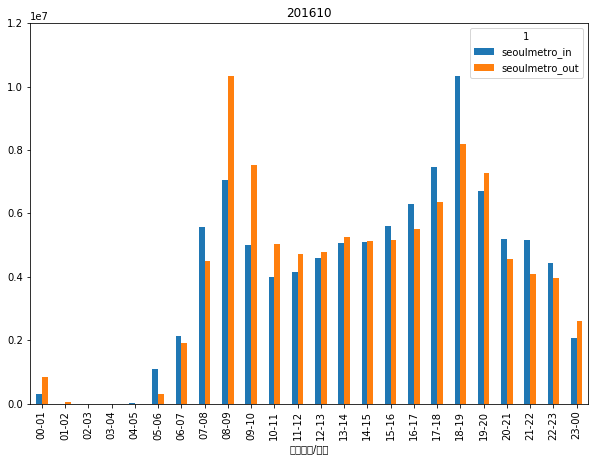

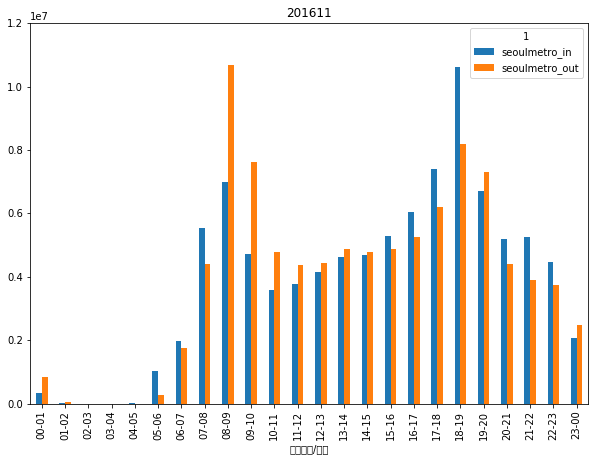

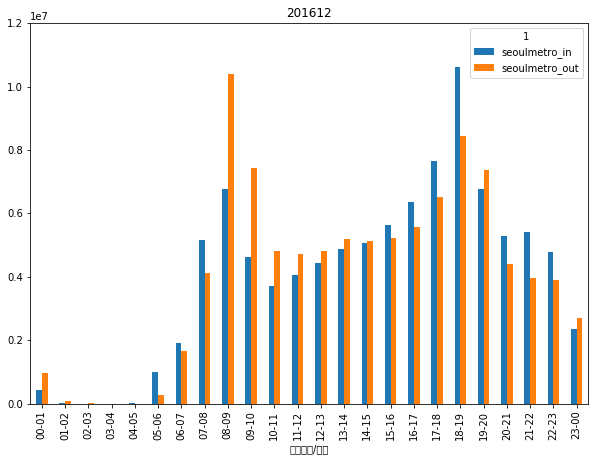

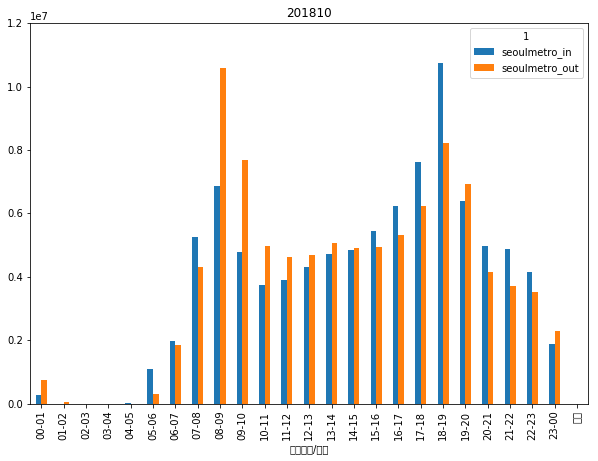

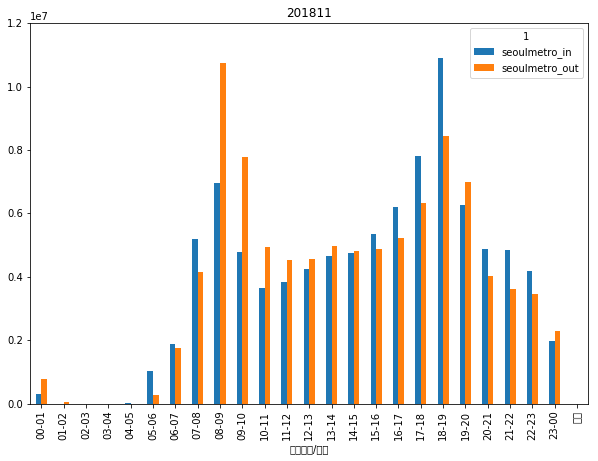

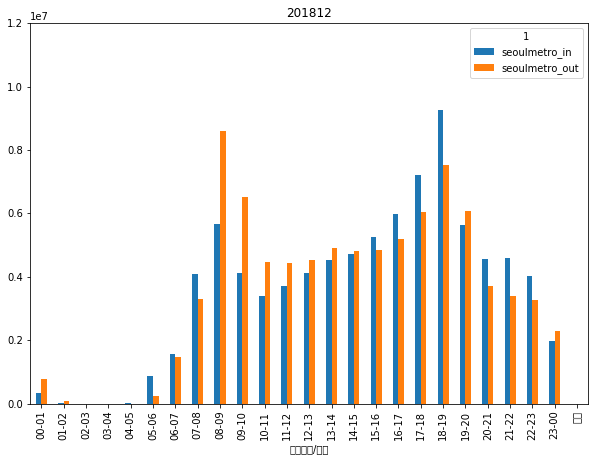

In [471]:

df.plot.bar()
axes = plt.axes()
axes.set_ylim(0, 12000000)
axes.title.set_text('201610')
plt.gcf().set_size_inches(10, 7)



df1.plot.bar()
axes = plt.axes()
axes.set_ylim(0, 12000000)
axes.title.set_text('201611')
plt.gcf().set_size_inches(10, 7)


df2.plot.bar()
axes = plt.axes()
axes.set_ylim(0, 12000000)
axes.title.set_text('201612')
plt.gcf().set_size_inches(10, 7)

df3.plot.bar()
axes = plt.axes()
axes.set_ylim(0, 12000000)
axes.title.set_text('201810')
plt.gcf().set_size_inches(10, 7)

df4.plot.bar()
axes = plt.axes()
axes.set_ylim(0, 12000000)
axes.title.set_text('201811')
plt.gcf().set_size_inches(10, 7)

df5.plot.bar()
axes = plt.axes()
axes.set_ylim(0, 12000000)
axes.title.set_text('201812')
plt.gcf().set_size_inches(10, 7)


# 서울 철도 인원 only

In [333]:
seoul_metro = results[column_names[1:8]].groupby('시간구분/기관').sum()
seoul_metro.rename(columns = {'서울메트로_승차': 'seoulmetro_in', '서울메트로_하차': 'seoulmetro_out', '서울도시철도공사_승차' : 'seoulcity_in', '서울도시철도공사_하차':'seoulcity_out'}, inplace = True)

In [354]:
compare_metro = seoul_metro.iloc[:,2:4]

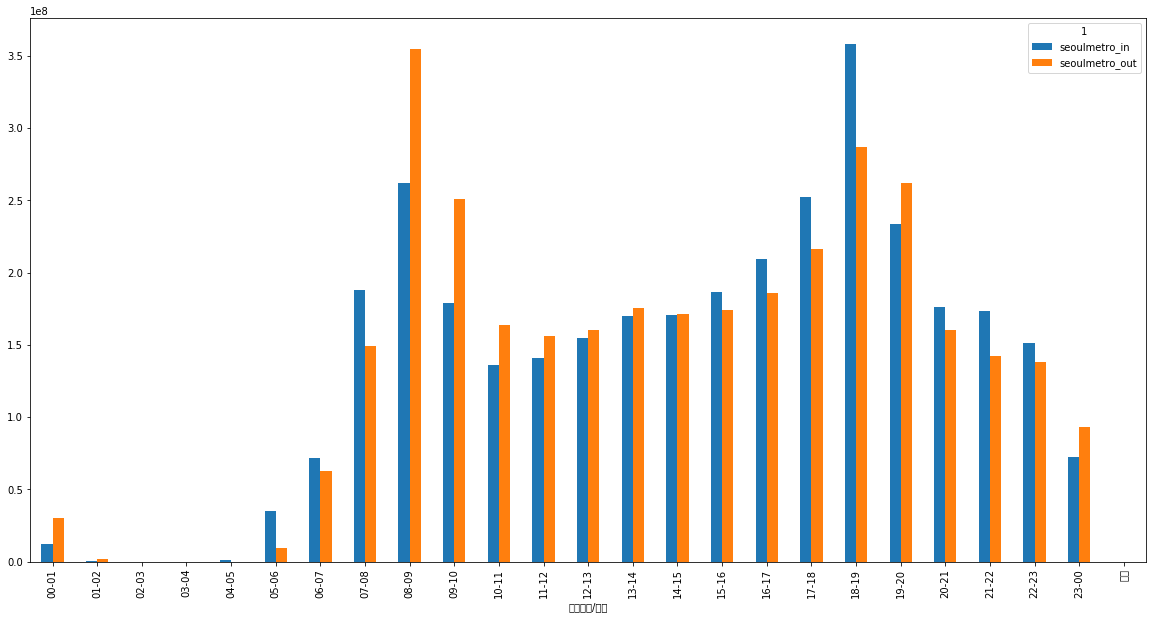

In [355]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

compare_metro.plot.bar()
plt.gcf().set_size_inches(20, 10)

1,합계_승차인원,합계_하차인원,서울메트로_승차,서울메트로_하차,서울도시철도공사_승차,서울도시철도공사_하차
연월,,,,,,
201601,230307892,222969344,120082517,119807990,53129696,52245619
201602,200617753,193339788,97169412,96647150,49355737,48461884
201603,257769523,249813964,133116699,132825789,60666475,59728783
201604,248770271,240952667,127585967,127280574,58645844,57772321
201605,255762965,247475275,130918095,130576016,59781473,58784522
201606,243411128,221893736,124949804,124643880,57045183,56080719
201607,238234049,225903226,122162514,117532534,55733074,54817425
201608,234248241,226017806,121166199,120867189,54443418,53609919
201609,227998055,220195703,117399806,117095004,53638187,52829127
